# 0. Подготовка данных (1 балл)

Данные представляют собой набор первых 10 букв от A до J латинского алфавита (каждая буква - класс), написанных разными шрифтами. Ваша задача - написать классификатор для этих данных, определяющий буквы на изображении

In [1]:
!wget -N http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz
!tar -xf notMNIST_large.tar.gz

--2021-02-14 14:49:55--  http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘notMNIST_large.tar.gz’ not modified on server. Omitting download.



In [2]:
DATA_DIR = 'notMNIST_large/'

In [3]:
from glob import glob
from PIL import Image
import os

for img_path in glob(f'{DATA_DIR}/**/*.png'):
  try:
    img = Image.open(img_path)
  except:
    os.remove(img_path)

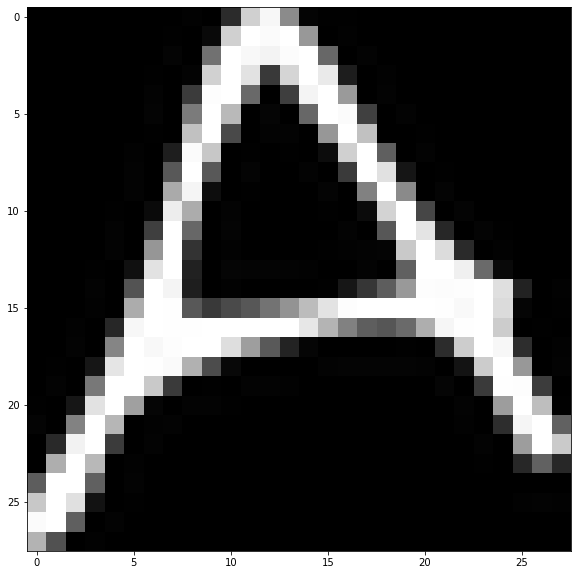

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(17,10))
letter = 'A'
img = cv2.imread(os.path.join(DATA_DIR, letter, os.listdir(f'{DATA_DIR}/{letter}/')[0]))
plt.imshow(img)

# Модель (3 балла)

In [5]:
import os
import keras
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers.core import Activation, Reshape, Dense, Flatten
from keras.layers import Conv2D, MaxPool2D, InputLayer, BatchNormalization, Dropout, GlobalAveragePooling2D, GlobalMaxPool2D, LeakyReLU
from keras.models import Model

n_classes = len(os.listdir(DATA_DIR))

input_shape = (28, 28, 1)


model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        BatchNormalization(),
        Conv2D(16, kernel_size=(3, 3)),
        BatchNormalization(),
        LeakyReLU(0.1),
        Conv2D(32, kernel_size=(3, 3)),
        BatchNormalization(),
        LeakyReLU(0.1),
        BatchNormalization(),
        MaxPool2D((2, 2)),
        Conv2D(32, kernel_size=(3, 3)),
        BatchNormalization(),
        LeakyReLU(0.1),
        Conv2D(64, kernel_size=(3, 3)),
        BatchNormalization(),
        LeakyReLU(0.1),
        Flatten(),
        Dense(256),
        BatchNormalization(),
        LeakyReLU(0.1),
        Dense(n_classes),
        Activation("softmax"),
    ]
)

# Аугментация данных (3 балла)

train/val split должен быть 9/1 !

In [6]:
# Подсказка: train/val split удобно делать вот так https://stackoverflow.com/questions/53037510/can-flow-from-directory-get-train-and-validation-data-from-the-same-directory-in (самый залайканый ответ)

from keras.preprocessing import image_dataset_from_directory

from keras.preprocessing.image import ImageDataGenerator

image_size=(28, 28)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=3,
    height_shift_range=3,
    rotation_range=7,
    validation_split=0.1,
)

test_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.1,
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    color_mode="grayscale",
    subset="training",
    seed=1,
    shuffle=True,
    target_size=image_size
)

validation_generator = test_datagen.flow_from_directory(
    DATA_DIR,
    color_mode="grayscale",
    subset="validation",
    seed=1,
    target_size=image_size
)

Found 476205 images belonging to 10 classes.
Found 52909 images belonging to 10 classes.


In [7]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 24, 24, 32)        0

# Обучение модели

val_accuracy > 0.85 - 1 балл

val_accuracy > 0.88 - 2 балла

val_accuracy > 0.91 - 3 балла

val_accuracy > 0.92 - 4 балла


**Максимальный суммарный балл** - 11

**Финальная оценка**: min(суммарный балл, 10)


In [8]:
step_size_train = (train_generator.n // train_generator.batch_size)
step_size_valid = (validation_generator.n // validation_generator.batch_size)

history = model.fit(
        train_generator,
        steps_per_epoch=step_size_train,
        epochs=10,
        verbose=1,
        validation_data=validation_generator,
        validation_steps=step_size_valid)

Epoch 1/10
14881/14881 [==============================] - 276s 18ms/step - loss: 0.4756 - accuracy: 0.8589 - val_loss: 0.2459 - val_accuracy: 0.9301
Epoch 2/10
14881/14881 [==============================] - 269s 18ms/step - loss: 0.3330 - accuracy: 0.9011 - val_loss: 0.2269 - val_accuracy: 0.9339
Epoch 3/10
14881/14881 [==============================] - 270s 18ms/step - loss: 0.3092 - accuracy: 0.9079 - val_loss: 0.2202 - val_accuracy: 0.9381
Epoch 4/10
14881/14881 [==============================] - 272s 18ms/step - loss: 0.2983 - accuracy: 0.9107 - val_loss: 0.2178 - val_accuracy: 0.9363
Epoch 5/10
14881/14881 [==============================] - 270s 18ms/step - loss: 0.2891 - accuracy: 0.9136 - val_loss: 0.2096 - val_accuracy: 0.9386
Epoch 6/10
14881/14881 [==============================] - 268s 18ms/step - loss: 0.2836 - accuracy: 0.9148 - val_loss: 0.2491 - val_accuracy: 0.9303
Epoch 7/10
14881/14881 [==============================] - 269s 18ms/step - loss: 0.2807 - accuracy: 0.9160